In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open ('transaction-data-adhoc-analysis.json') as f:
    boom = pd.read_json(f)

#remove the day in the transaction date to extract the year and month
boom["transaction_date"] = boom["transaction_date"].str[:-3]

#create a column for the order id to keep track of which transactions are together before splitting them by line item
dlist = boom["transaction_items"].tolist()
order_id = np.arange(len(dlist))
boom["order_id"] = order_id

#get the unique values and make them into an array
months_list = boom["transaction_date"].unique()
months_array = np.array(months_list) 

#create a pivot table for the count of each customer's transaction(s) per month
bduser = pd.pivot_table(boom, values = ["order_id"], index = "username", columns = "transaction_date", fill_value = 0, aggfunc = "nunique") 
bduser_df = bduser.reset_index()
bduser_df["total"] = bduser_df.sum(axis = 1, numeric_only=True)

#identify the top customers based on the total number of transactions
hightranstotal = bduser_df.sort_values("total", ascending = False)

#set index of dataframe based on the order_id
boom = boom.set_index("order_id")

#Make the default False
cutomcount = len(alltrans_count[0]["order_id"]) #Count number of customers
purchasedstat = [False]*cutomcount
repeaterstat = [False]*cutomcount
inactivestat = [False]*cutomcount
engagedstat = [False]*cutomcount
newstat = [False]*cutomcount
oldstat = [False]*cutomcount
repeater_count = []
inactive_count = []
engaged_count = []
new_count = []

#iterating all the months
a = 0
while a < len(alltrans_count):
    #iterating all the customers for each month
    y = 0 #indexing the customer
    while y < len(alltrans_count[0]["order_id"]):
        if (alltrans_count[a]["order_id"][y] > 0) and (purchasedstat[y] == False):
            purchasedstat[y] = True
        
        #New
        if (a == 0): #if current month is their first month
            if purchasedstat[y] == True:
                oldstat[y] = True
                newstat[y] = True
        if (a > 0): #if the current month is not their first month
            if oldstat[y] == False and alltrans_count[a]["order_id"][y] > 0:
                oldstat[y] = True
                newstat[y] = True
            else: #ensure old customers are no longer in the new customer count
                newstat[y] = False
        
        #Repeater
        if (a == 0): #if the current month is their first month
            repeaterstat[y] = False
        if (a > 0): #if the current month is not their first month
            #check if the customer has purchased in the previous and current month
            if (alltrans_count[a-1]["order_id"][y] and alltrans_count[a]["order_id"][y]> 0): 
                repeaterstat[y] = True
            else:
                repeaterstat[y] = False

        #Inactive
        if (a == 0): #if current month is their first month
            inactivestat[y] = False
        if (a > 0): #if the current month is not their first month
            #check if the customer has purchased in any of the previous months and has not purchased for the current month
            if (purchasedstat[y] == True and alltrans_count[a]["order_id"][y] == 0): 
                inactivestat[y] = True
            else:
                inactivestat[y] = False

        #Engaged
        if (a == 0): #if current month is their first month
            # If the customer has purchased,
            if (alltrans_count[a]["order_id"][y] > 0):
                engagedstat[y] = True
        if (a > 0): #if the current month is not their first month
            #check if the customer has purchased in the each of the previous months and current month
            if (alltrans_count[a]["order_id"][y] > 0) and (engagedstat[y] == True):
                engagedstat[y] = True
            else:
                engagedstat[y] = False
        
        y += 1 #next customer
    a += 1 #next month  
    #store the count 
    repeater_count.append(repeaterstat.count(True))
    inactive_count.append(inactivestat.count(True))
    engaged_count.append(engagedstat.count(True))
    new_count.append(newstat.count(True))

frequency_df = pd.DataFrame({"Month": months_array, "Repeater": repeater_count, "Inactive": inactive_count, "Engaged": engaged_count, "New": new_count})
frequency_df = frequency_df.T #transpose the index and columns
frequency_df.columns = frequency_df.iloc[0] #place the months as the header
frequency_df = frequency_df[1:]

In [103]:
#each customer's transaction(s) per month
bduser_df

username order_id                                          \
transaction_date             2022/01 2022/02 2022/03 2022/04 2022/05 2022/06   
0                    aadams        3       2       1       1       0       1   
1                  aaguilar        0       0       2       1       0       2   
2                  aalvarez        0       1       3       1       1       0   
3                   aaron02        2       1       3       3       0       2   
4                   aaron15        0       1       3       1       0       3   
...                     ...      ...     ...     ...     ...     ...     ...   
8500                zwatson        2       2       2       0       0       2   
8501                 zweber        1       1       0       2       2       1   
8502                 zwelch        2       3       1       2       2       1   
8503                 zwhite        1       3       2       0       6       6   
8504              zwilliams        1       3       3       1       0       0   

                 total  
transaction_date        
0                    8  
1                    5  
2                    6  
3                   11  
4                    8  
...                ...  
8500                 8  
8501                 7  
8502                11  
8503                18  
8504                 8  

[8505 rows x 8 columns]

In [104]:
#top 10 customer with highest count of total transactions
hightranstotal[:10]

username order_id                                  \
transaction_date               2022/01 2022/02 2022/03 2022/04 2022/05   
7656                   tsmith        6       9      13       8       7   
1430                   cjones        8       8      11       8       7   
8468                  zmartin        9       4       8       8      11   
8386                   ysmith        9       7       8       9       5   
2346                   esmith        5       7       9       8       8   
3854              jonesnicole        9       3       9       5       9   
8261                 xjohnson        9       8       6       9       4   
532                    asmith        9       8       6       3       7   
3994                   jsmith        6       6       4       5       6   
8491                   zsmith        7       3       7       8       8   

                         total  
transaction_date 2022/06        
7656                  10    53  
1430                  10    52  
8468                   8    48  
8386                   8    46  
2346                   7    44  
3854                   8    43  
8261                   6    42  
532                    7    40  
3994                  11    38  
8491                   3    36

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'tsmith'),
  Text(1, 0, 'cjones'),
  Text(2, 0, 'zmartin'),
  Text(3, 0, 'ysmith'),
  Text(4, 0, 'esmith'),
  Text(5, 0, 'jonesnicole'),
  Text(6, 0, 'xjohnson'),
  Text(7, 0, 'asmith'),
  Text(8, 0, 'jsmith'),
  Text(9, 0, 'zsmith')])

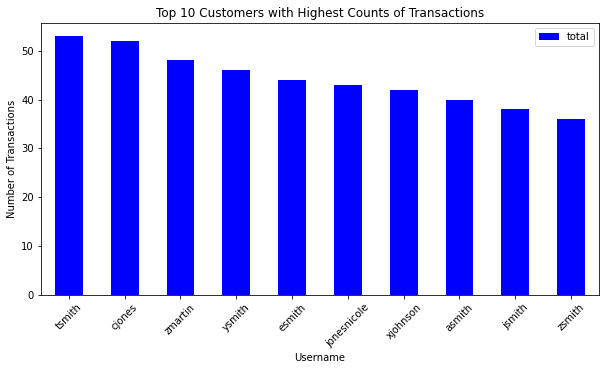

In [105]:
#bar graph for hightranstotal
hightranstotal[:10].plot(kind = "bar", x ="username", y = "total", xlabel = "Username", ylabel = "Number of Transactions", figsize = (10,5), color = "blue", title = "Top 10 Customers with Highest Counts of Transactions")
plt.xticks(rotation = 45)

In [93]:
frequency_df

Month,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06
Repeater,0,5167,5239,5191,5126,5208
Inactive,0,1416,1728,1912,1915,1840
Engaged,6583,5167,4141,3304,2685,2210
New,6583,1463,340,94,22,3


Text(0.5, 1.0, "Count of 'Repeaters' Customers")

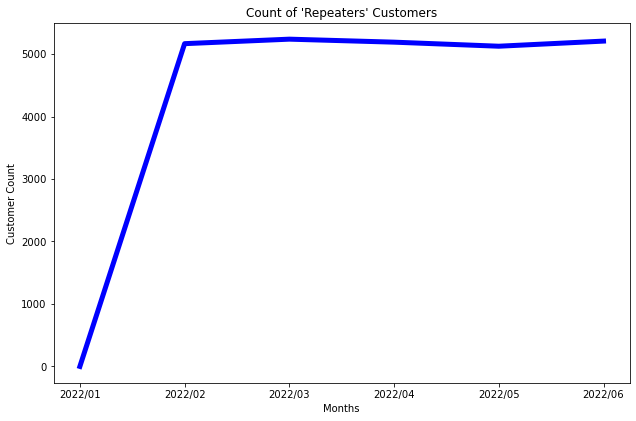

In [94]:
fig=plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(months_array, repeater_count, label = "Repeaters", color = "blue", linewidth = 5)
plt.xlabel("Months")
plt.ylabel("Customer Count")
plt.title("Count of 'Repeaters' Customers")

Text(0.5, 1.0, "Count of 'Repeaters' Customers")

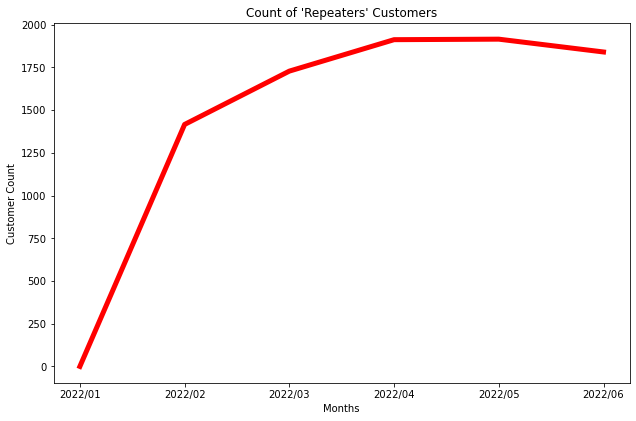

In [95]:
fig=plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(months_array, inactive_count, label = "Inactive", color = "red", linewidth = 5)
plt.xlabel("Months")
plt.ylabel("Customer Count")
plt.title("Count of 'Repeaters' Customers")

Text(0.5, 1.0, "Count of 'Repeaters' Customers")

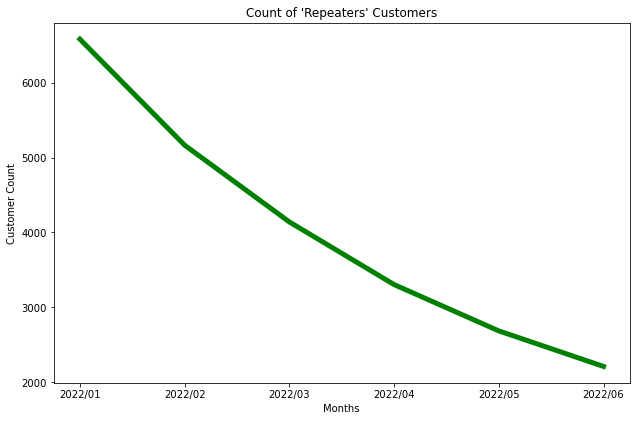

In [96]:
fig=plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(months_array, engaged_count, label = "Engaged", color = "green", linewidth = 5)
plt.xlabel("Months")
plt.ylabel("Customer Count")
plt.title("Count of 'Repeaters' Customers")

Text(0.5, 1.0, "Count of 'Repeaters' Customers")

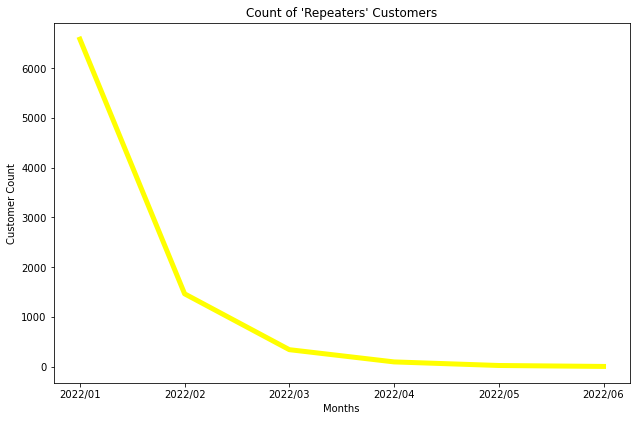

In [97]:
fig=plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(months_array, new_count, label = "New", color = "yellow", linewidth = 5)
plt.xlabel("Months")
plt.ylabel("Customer Count")
plt.title("Count of 'Repeaters' Customers")

Text(0.5, 1.0, 'Cumulative Customer Metrics')

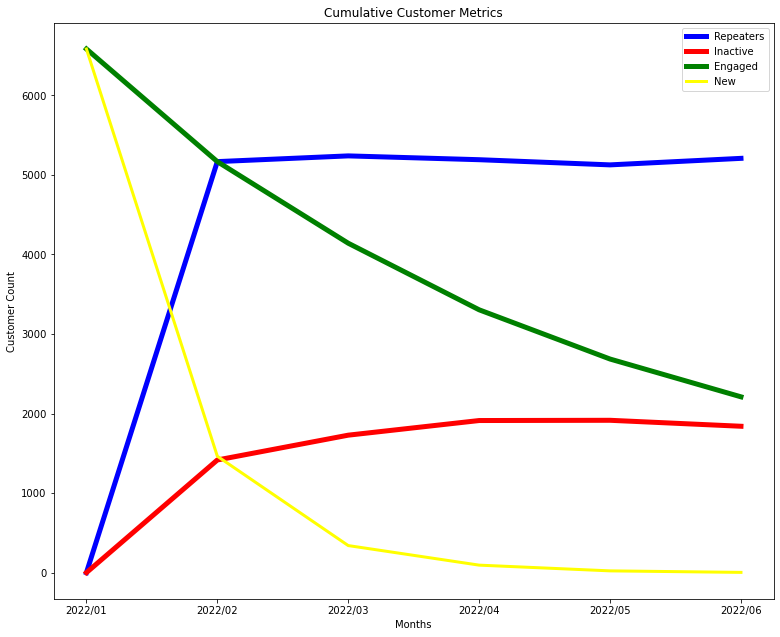

In [98]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(months_array, repeater_count, label = "Repeaters", color = "blue", linewidth = 5)
ax.plot(months_array, inactive_count, label = "Inactive", color = "red", linewidth = 5)
ax.plot(months_array, engaged_count, label = "Engaged", color = "green", linewidth = 5)
ax.plot(months_array, new_count, label = "New", color = "yellow", linewidth = 3)
ax.legend()
plt.xlabel("Months")
plt.ylabel("Customer Count")
plt.title("Cumulative Customer Metrics")